Diciembre 2024

Autor: Alejandra Cruz Vargas

[Data](https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset)

# Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploración de los datos

### Importar la base de datos

In [ ]:
data=pd.read_csv('/content/shopping_trends.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


['Yes' 'No']
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


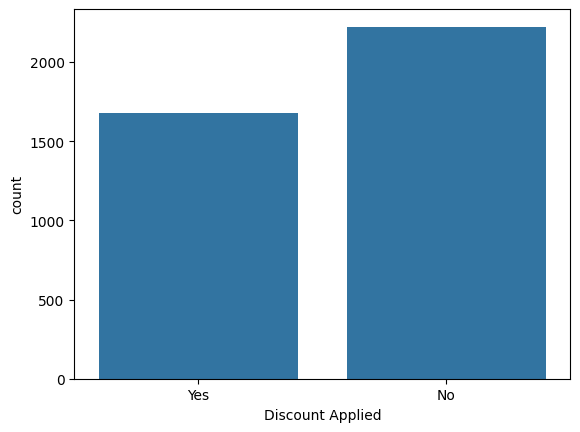

In [ ]:
# Verificar los valores únicos en la columna 'Discount Applied'
print(data['Discount Applied'].unique())

# Contar la frecuencia de cada valor único
print(data['Discount Applied'].value_counts())

# Mostrar la distribución de los datos usando un gráfico de barras
sns.countplot(x='Discount Applied', data=data)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Conteo de valores nulos

In [ ]:
data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


### Porcentaje de Hombres vs Mujeres

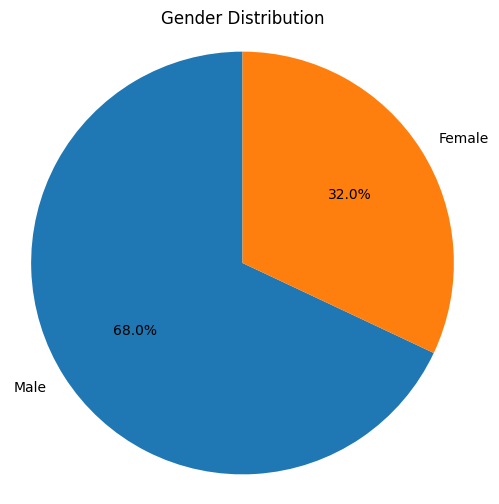

In [ ]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Asegurar que se dibuje un círculo
plt.show()

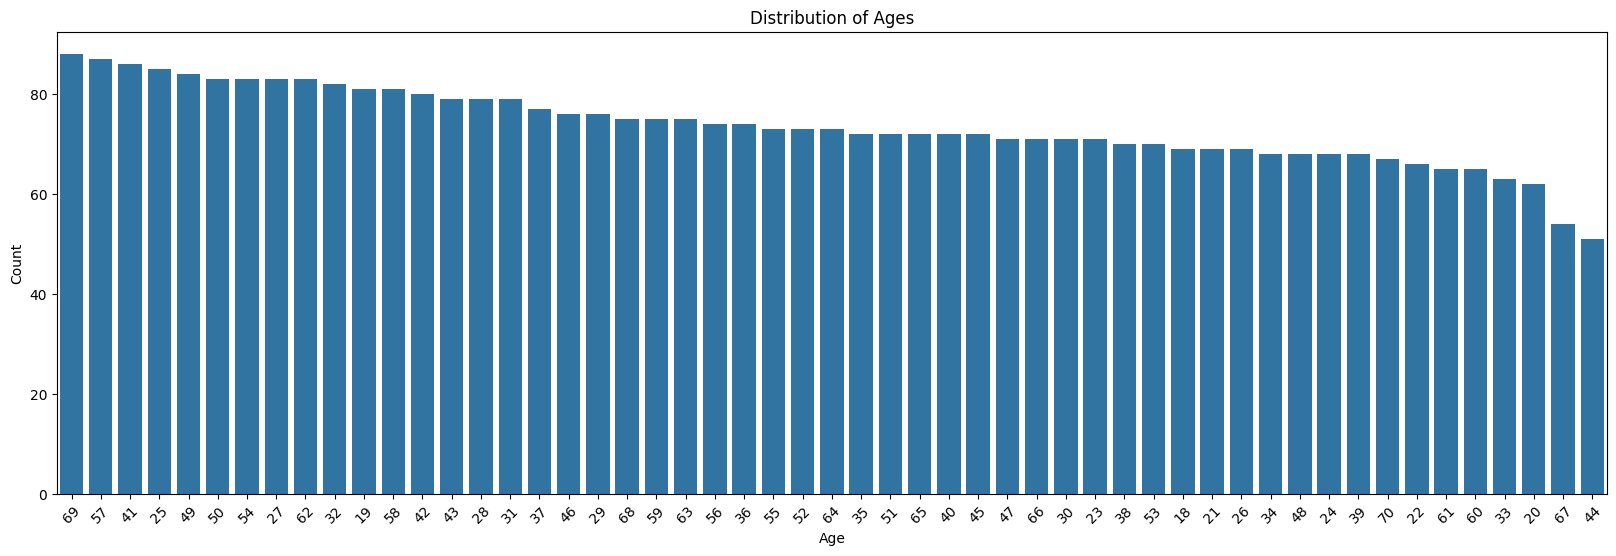

In [ ]:
# Calcular la frecuencia de cada edad
age_counts = data['Age'].value_counts()

# Ordenar los conteos de edades en orden descendente para encontrar las edades más frecuentes
most_frequent_ages = age_counts.sort_values(ascending=False)

# Graficar las edades más frecuentes
plt.figure(figsize=(20, 6))
sns.countplot(x='Age', data=data, order=data['Age'].value_counts().index)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

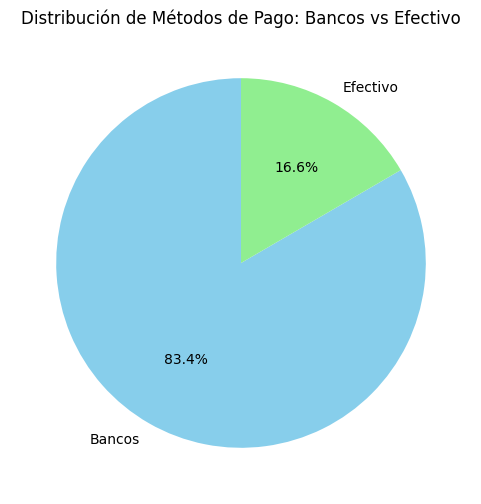

In [ ]:
# Contar las ocurrencias de cada método de pago
payment_counts = data['Payment Method'].value_counts()

# Sumar los métodos asociados a Bancos
Bancos = payment_counts[['Credit Card', 'Bank Transfer', 'PayPal', 'Venmo', 'Debit Card']].sum()

# Obtener el número de pagos en efectivo
Efectivo = payment_counts.get('Cash', 0)  # Usamos .get para evitar errores si 'Cash' no está presente

# Datos para el gráfico
labels = ['Bancos', 'Efectivo']
sizes = [Bancos, Efectivo]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Distribución de Métodos de Pago: Bancos vs Efectivo')
plt.show()


Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


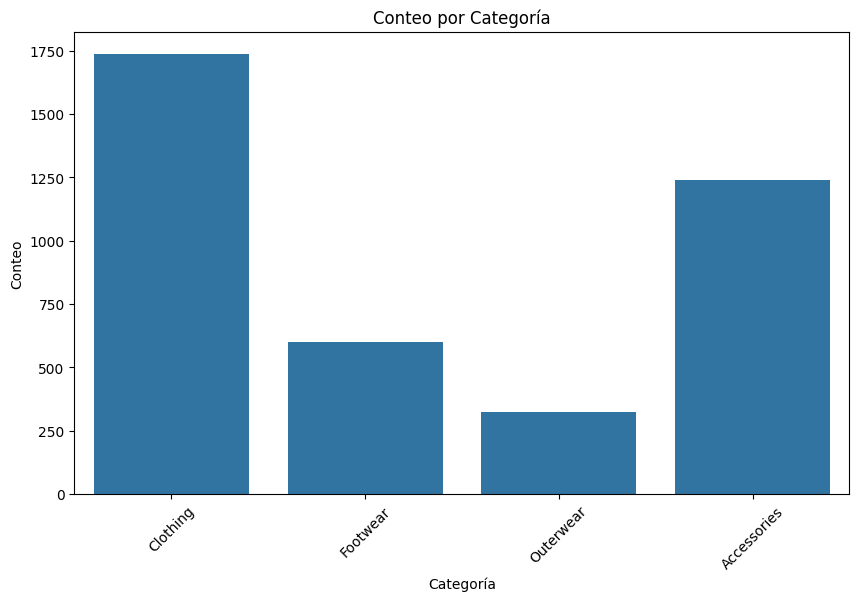

In [ ]:
# Agrupar por categoría y contar las ocurrencias
category_counts = data['Category'].value_counts()

# Imprimir el conteo por categoría
print(category_counts)

# Crear un gráfico de barras para visualizar el conteo
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data)
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.title('Conteo por Categoría')
plt.xticks(rotation=45)
plt.show()

Los artículos más vendidos son de la categoría 'Ropa'.

<ipython-input-78-1d9862961a44>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Item Purchased').size()


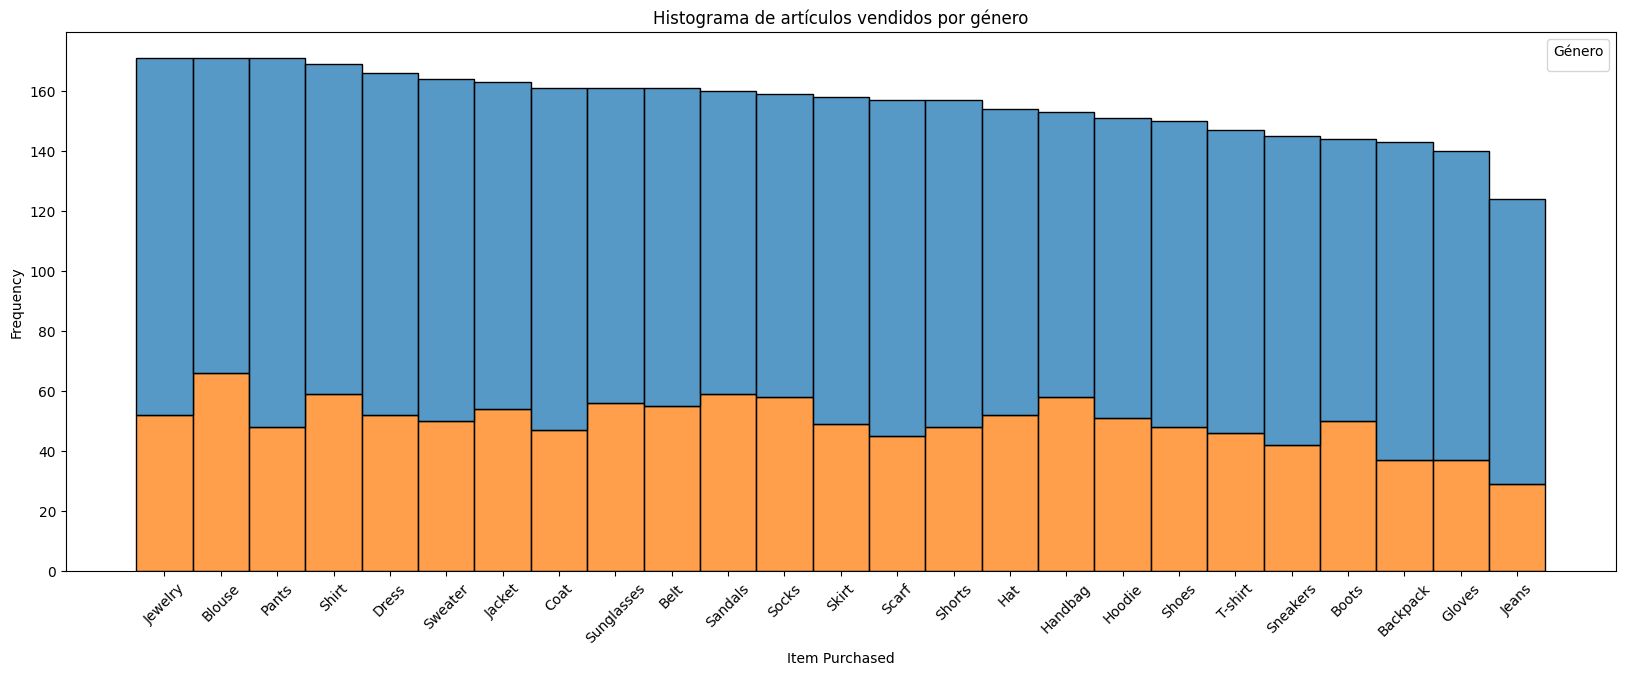

In [ ]:
# Calcular las frecuencias totales por categoría
category_order = (
    data.groupby('Item Purchased').size()
    .sort_values(ascending=False)
    .index
)

# Reordenar los datos de acuerdo al tamaño
data['Item Purchased'] = pd.Categorical(data['Item Purchased'], categories=category_order, ordered=True)

# Gráfica ordenada
plt.figure(figsize=(20, 7))
sns.histplot(data=data, x='Item Purchased', hue='Gender', bins=len(category_order), multiple='stack', edgecolor='black')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.title('Histograma de artículos vendidos por género')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()



In [ ]:
Item_Purchased = data['Item Purchased'].value_counts()
Item_Purchased

,count
Item Purchased,
Jewelry,171
Blouse,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Coat,161
Sunglasses,161


El rango de las ventas por artículo es pequeño, así que vamos a revisar el monto pagado por cada uno de ellos.

<ipython-input-79-6d3194d281c8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Amount_Spent = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
<ipython-input-79-6d3194d281c8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


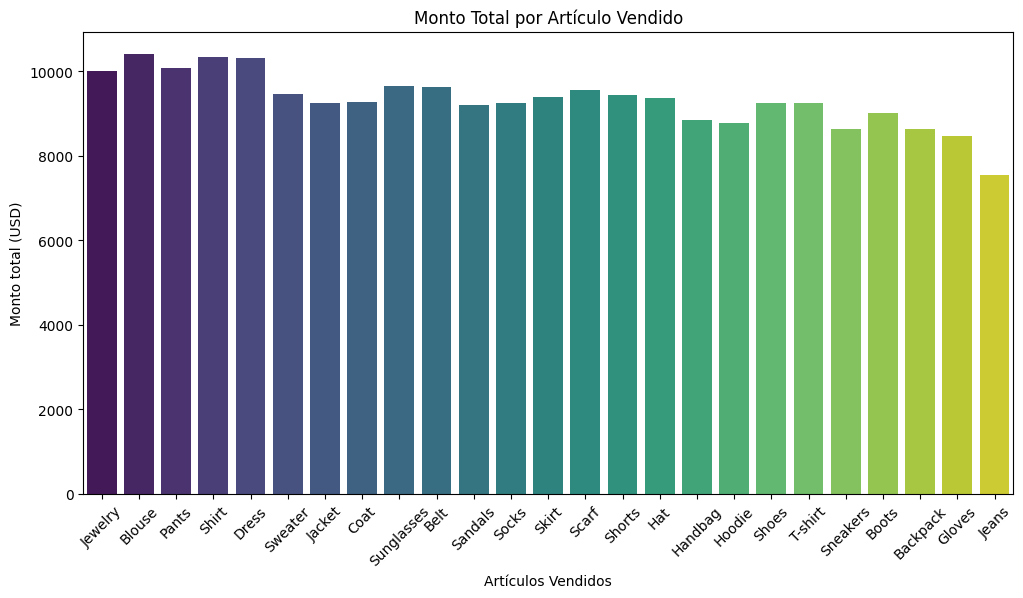

In [ ]:
# Calcular los montos totales por categoría
Amount_Spent = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=Amount_Spent,
    x='Item Purchased',
    y='Purchase Amount (USD)',
    palette='viridis'
)
plt.xlabel('Artículos Vendidos')
plt.ylabel('Monto total (USD)')
plt.title('Monto Total por Artículo Vendido')
plt.xticks(rotation=45)  #Rotar las etiquetas si son largas
plt.show()


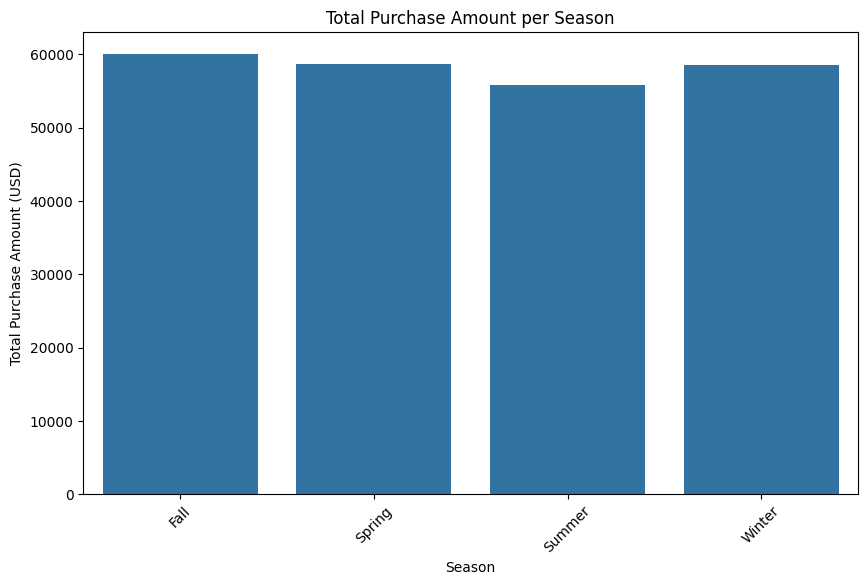

,Purchase Amount (USD)
Season,
Fall,60018
Spring,58679
Summer,55777
Winter,58607


In [ ]:
# Calcular el monto total de compras por temporada (asumiendo que existe la columna 'Season').
season_sales = data.groupby('Season')['Purchase Amount (USD)'].sum()

#
plt.figure(figsize=(10, 6))
sns.barplot(x=season_sales.index, y=season_sales.values)
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount per Season')
plt.xticks(rotation=45)
plt.show()

# Imprimir el monto total
season_sales

      Category Discount Applied  Purchase Amount (USD)
1  Accessories              Yes                  31760
3     Clothing              Yes                  43679
5     Footwear              Yes                  16006
7    Outerwear              Yes                   7966


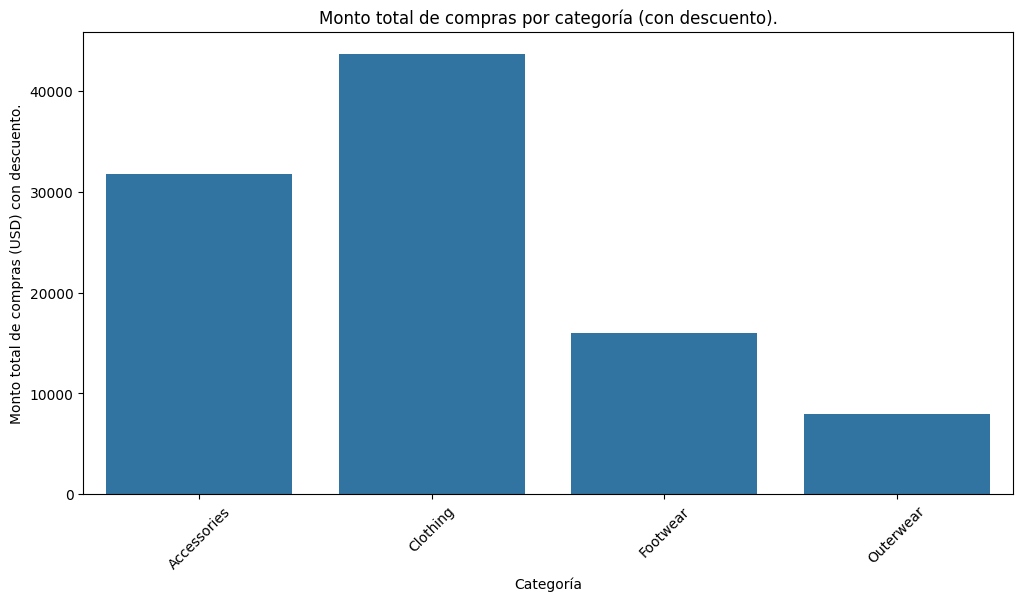

In [ ]:
# Agrupar los datos por 'Category' y 'Discount Applied'
category_discount_sales = data.groupby(['Category', 'Discount Applied'])['Purchase Amount (USD)'].sum().reset_index()

# Filtrar las filas donde 'Discount Applied' es 'Yes'
discounted_items = category_discount_sales[category_discount_sales['Discount Applied'] == 'Yes']

# Imprimir los resultados
print(discounted_items)

# Crear una gráfica para visualizar las ventas con descuento por categoría
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=discounted_items)
plt.xlabel('Categoría')
plt.ylabel('Monto total de compras (USD) con descuento.')
plt.title('Monto total de compras por categoría (con descuento).')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filtrar las filas donde 'Discount Applied' es 'Yes'.
no_discount_items = data[data['Discount Applied'] == 'No']

# Agrupar por 'Item Purchased' y suma 'Purchase Amount (USD)'.
item_sales_no_discount = no_discount_items.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Encontrar el artículo con las ventas más altas.
best_selling_item_no_discount = item_sales_no_discount.idxmax()
best_selling_amount_no_discount = item_sales_no_discount.sum()

print(f"El artículo más vendido sin descuento es: {best_selling_item_no_discount}")
print(f"Monto total vendido sin descuento: {best_selling_amount_no_discount}")

El artículo más vendido sin descuento es: Blouse
Monto total vendido sin descuento: 133670


<ipython-input-83-4683e902dd7b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_sales_no_discount = no_discount_items.groupby('Item Purchased')['Purchase Amount (USD)'].sum()


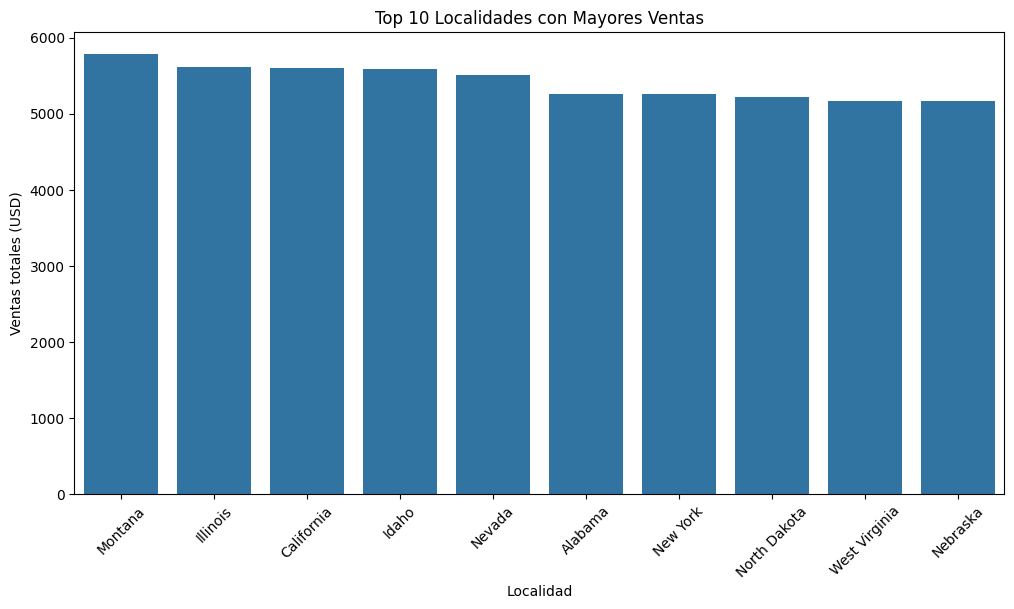

In [ ]:
# Agrupar por localidad y sumar las ventas
sales_by_location = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Obtener las 10 mejores localidades
top_10_locations = sales_by_location.head(10)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.xlabel('Localidad')
plt.ylabel('Ventas totales (USD)')
plt.title('Top 10 Localidades con Mayores Ventas')
plt.xticks(rotation=45)
plt.show()

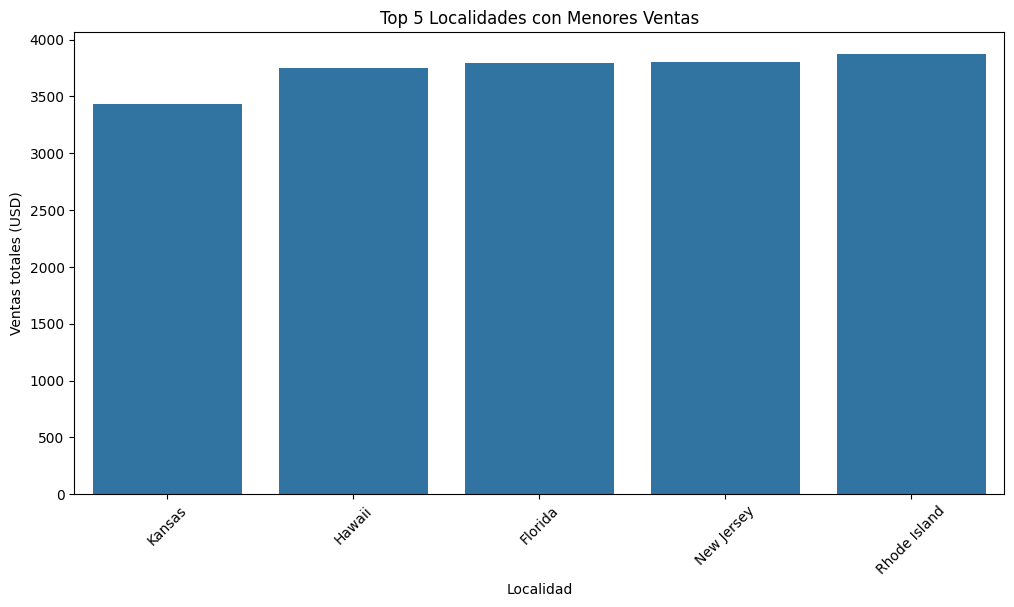

In [ ]:
# Agrupar por localidad y sumar las ventas
sales_by_location = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=True)

# Obtener las 10 peores localidades
bottom_5_locations = sales_by_location.head(5)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_5_locations.index, y=bottom_5_locations.values)
plt.xlabel('Localidad')
plt.ylabel('Ventas totales (USD)')
plt.title('Top 5 Localidades con Menores Ventas')
plt.xticks(rotation=45)
plt.show()

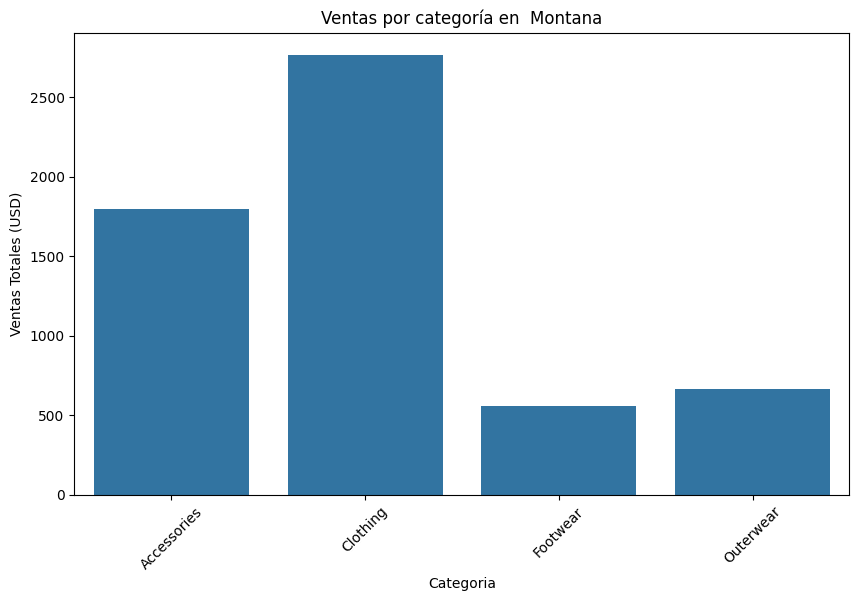

,Purchase Amount (USD)
Category,
Accessories,1797
Clothing,2768
Footwear,555
Outerwear,664


In [ ]:
# Filtrar datos de Montana
montana_sales = data[data['Location'] == 'Montana']

# Agrupar por categoría y sumar los montos
sales_by_category_montana = montana_sales.groupby('Category')['Purchase Amount (USD)'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category_montana.index, y=sales_by_category_montana.values)
plt.xlabel('Categoria')
plt.ylabel('Ventas Totales (USD)')
plt.title('Ventas por categoría en  Montana')
plt.xticks(rotation=45)
plt.show()

# Imprimir los datos de ventas para verificar
sales_by_category_montana

Season
Fall      1303
Spring    1324
Summer    1526
Winter    1631
Name: Purchase Amount (USD), dtype: int64


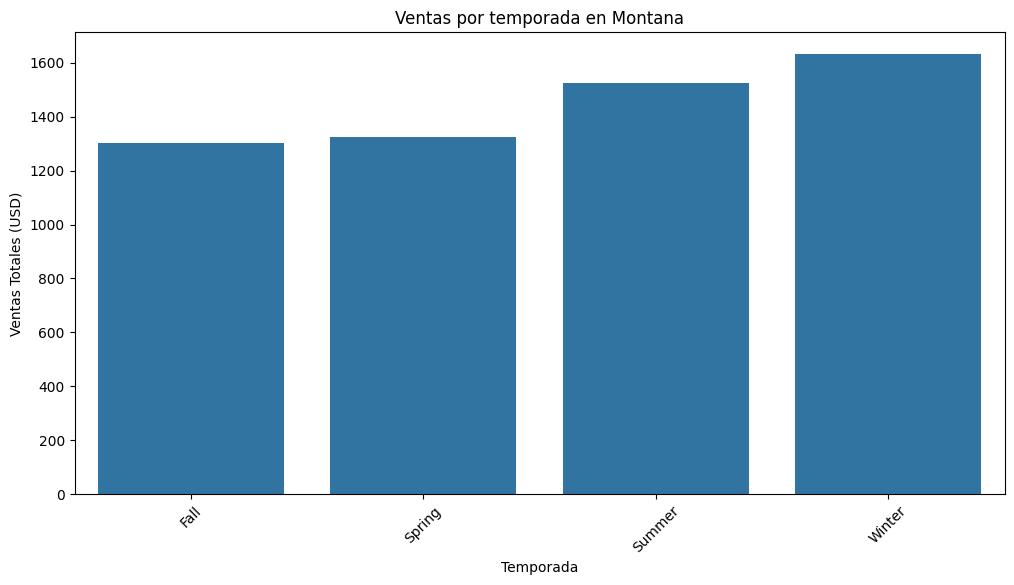

In [ ]:
#
montana_data = data[data['Location'] == 'Montana']

# Agrupar por 'Season' y 'Purchase Amount (USD)'
sales_per_session_montana = montana_data.groupby('Season')['Purchase Amount (USD)'].sum()

# Mostrar las ventas por sesión.
print(sales_per_session_montana)

# Crear un gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_per_session_montana.index, y=sales_per_session_montana.values)
plt.xlabel('Temporada')
plt.ylabel('Ventas Totales (USD)')
plt.title('Ventas por temporada en Montana')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filtrar datos de Montana
montana_data = data[data['Location'] == 'Montana']

# Agrupar por artículo comprado y sumar el monto de la compra.
sales_by_item_montana = montana_data.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Find the item with the highest sales
best_selling_item_montana = sales_by_item_montana.idxmax()

# Print the result
print(f"El artículo más vendido en Montana es: {best_selling_item_montana}")

The best-selling item in Montana is: Coat


<ipython-input-57-a121f671ebbc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_item_montana = montana_sales.groupby('Item Purchased')['Purchase Amount (USD)'].sum()


In [ ]:
# Extraer la columna 'Age' de Montana
montana_ages = montana_data['Age']

# Calcular las frecuencias de las edades
age_counts = montana_ages.value_counts()

# Encontrar las edades más frecuentes
most_frequent_ages = age_counts[age_counts == age_counts.max()]

# Imprimmir los resultados
print(f"La edad más popular en Montana es: {most_frequent_ages}")

The most popular age(s) in Montana are: Age
52    5
Name: count, dtype: int64


In [ ]:
# Contar las ocurrencias para cada género
gender_counts_montana = montana_data['Gender'].value_counts()

# Encontrar el género más frecuente
most_popular_gender_montana = gender_counts_montana.index[0]

# Imprimir los resultados
print(f"El género más popular en Montana es: {most_popular_gender_montana}")

The most popular gender in Montana is: Male
